# The impact of Covid-19 on AirBnB stays in London and Athens

In [1]:
import datetime
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

## Notes
* The two dataframes are imported from the URLs
* Then a new column is created with the corresponding city names
* Then a combined dataframe is created using the concat function
* Finally, a histogram is plotted with the count of reviews vs. year

In [2]:
def create_dfs(london_url, athens_url):
    london=pd.read_csv(london_url, index_col="listing_id")
    athens=pd.read_csv(athens_url, index_col="listing_id")
    london['city']='London'
    athens['city']='Athens'

    df_all=pd.concat([london, athens], axis=0)

    df_all['date'] =  pd.to_datetime(df_all['date'], infer_datetime_format=True)
    df_all['year'] = pd.DatetimeIndex(df_all['date']).year
    df_all=df_all.sort_values('year',ascending=False)
    return df_all


def plot_data(df):
    sns.histplot(data=df, x="year", hue='city',multiple="dodge", shrink=.8, discrete=True)
    # df['year'].value_counts().plot(kind='bar',title='Count of Reviews by Year')
    # plt.legend(['Athens', 'London'])
    plt.show()

                         date    city  year
listing_id                                 
605617198416835367 2022-05-23  London  2022
49361737           2022-03-13  London  2022
32376486           2022-07-01  London  2022
32376486           2022-06-08  London  2022
32376486           2022-07-10  London  2022
...                       ...     ...   ...
25123              2010-07-25  London  2010
25123              2010-09-28  London  2010
42010              2010-12-28  London  2010
15400              2010-10-02  London  2010
15400              2009-12-21  London  2009

[1752910 rows x 3 columns]


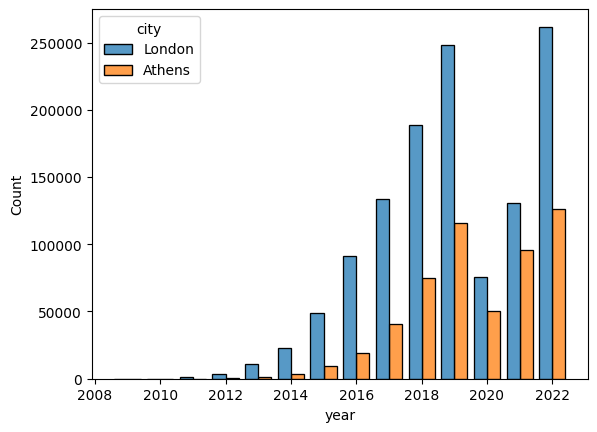

In [3]:
    df = create_dfs('http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/visualisations/reviews.csv',
    'http://data.insideairbnb.com/greece/attica/athens/2022-09-20/visualisations/reviews.csv')
    print(df)
    plot_data(df) 

## Graph Observations
The graph presents the number of counts of AirBnB reviews per year from 2009 until 2022 in London (blue) and in Athens (orange).
Assuming that the number of reviews corresponds to the number of AirBnB stays we can make the following observations.
* The number of people using AirBnB in London is 2 to 3 times higher compared to Athens. This can be explained by the fact that London is in the top 3 of the most visited cities in the world.
* For both cities the use of AirBnB seems to be increasing exponentially upto 2019.
* In 2020 and 2021 a sudden and deep decrease in AirBnB uses was observed which can be explained by the restrictions of travelling during the COVID-19 pandemic. Both cities are popular for international tourism and the graph shows how significantly they have been impacted during the coronavirus outbreak.